In [1]:
!pip3 install matplotlib==3.10.3
!pip3 install seaborn==0.13.2
!pip3 install sentence-transformers==3.4.1


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


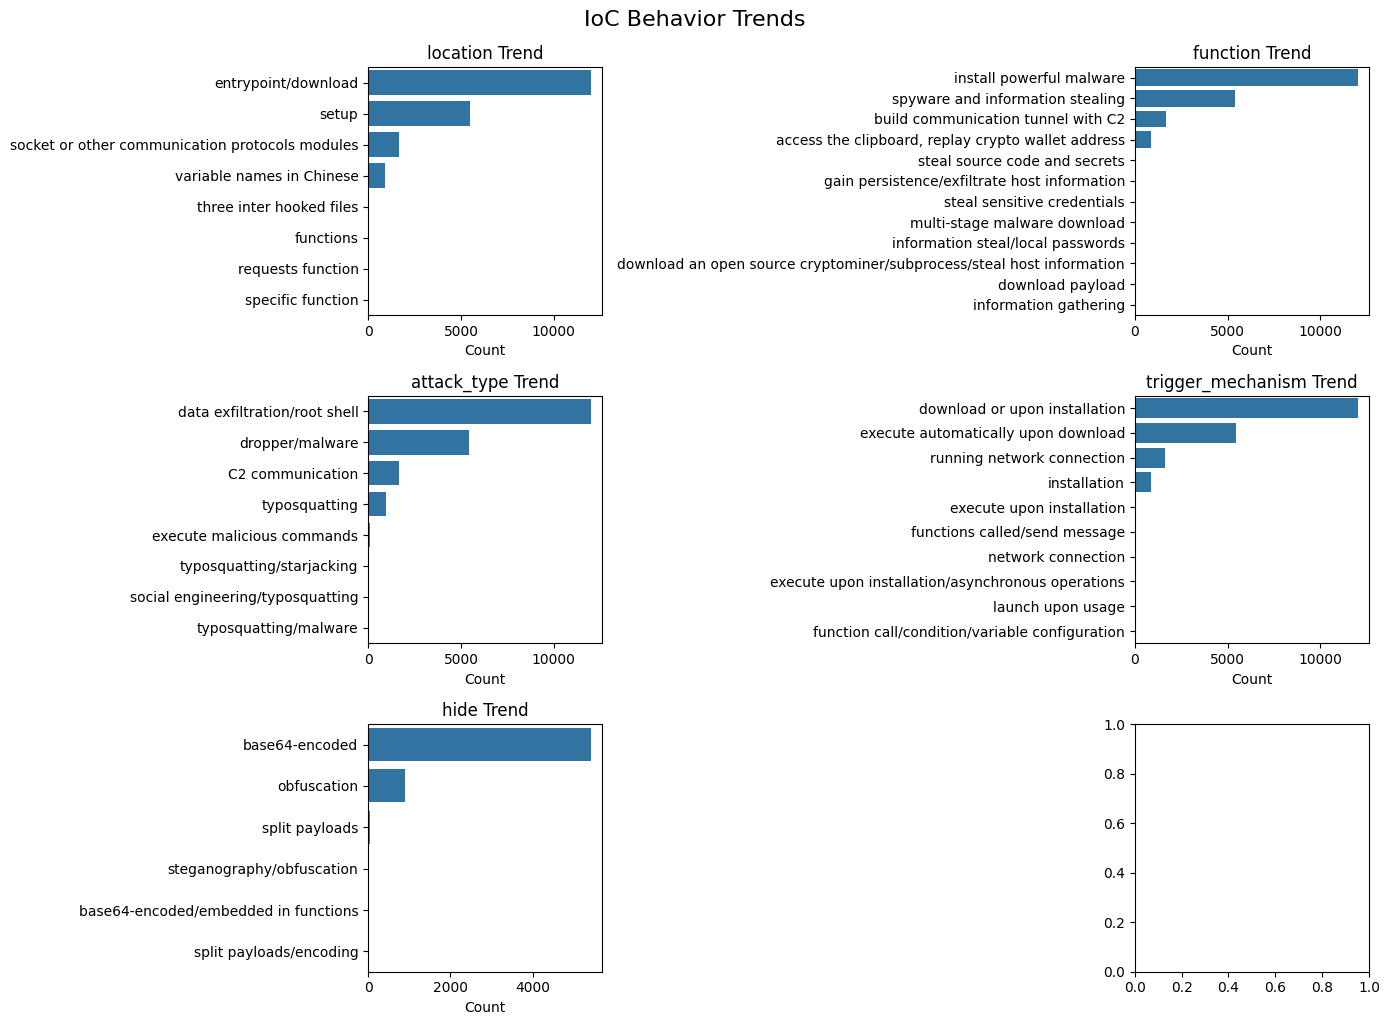

In [2]:
'''
 # @ Create Time: 2025-06-15 11:17:36
 # @ Modified time: 2025-06-15 11:17:58
 # @ Description: based on ioc_metrics.csv, visualize the trends of IoC behaviors, 
 used to analyze the relibility of top features from different methods
 ''' 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


df = pd.read_csv("data_metrics.csv")

fields = ['location', 'function', 'attack_type', 'trigger_mechanism', 'hide']
trend_counts = {field: df[field].value_counts() for field in fields}

# visualize the trend
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, field in enumerate(fields):
    sns.barplot(x=trend_counts[field].values, y=trend_counts[field].index, ax=axes[i])
    axes[i].set_title(f"{field} Trend")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.suptitle("IoC Behavior Trends", fontsize=16, y=1.02)
plt.show()

In [3]:
# for category, trend_items in trend_counts.items():
#     print(category)
#     print(trend_items)
#     print(type(trend_items))
#     trend_keys = list(trend_items.index)   
#     print(trend_keys)
#     trend_counts = trend_items.values
#     print(trend_counts)

In [4]:
import sys
from pathlib import Path
sys.path.insert(0, Path(sys.path[0]).as_posix())
from trendscore import compute_trend_score

/Users/zhuoran/.pyenv/versions/3.10.14/envs/DDGRL/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
entropy_top_features_with_scores = [
    ("Readline/readline-i.ri", 1.0000), ("libxml/xmlstring.h", 1.0000),
    ("ClassMethods/commands-i.ri", 1.0000), ("bundler/plugin", 1.0000),
    ("Color/set_color-i.ri", 1.0000), ("HiddenCommand/cdesc-HiddenCommand.ri", 1.0000),
    ("Thor/Base", 1.0000), ("templates/newgem", 1.0000),
    ("Actions/inject_into_class-i.ri", 1.0000), ("source/git", 1.0000)
]

corr_top_features_with_scores = [
    ("socket unique ips", 0.3601),
    ("socket unique hostnames", 0.2438),
    ("file write count", 0.2249),
    ("file unique paths", 0.2187),
    ("dns unique types", 0.1866),
    ("dns total queries", 0.1290),
    ("dns unique hosts", 0.1287),
    ("file read count", 0.1199),
    ("cmd total count", 0.1128),
    ("cmd unique commands", 0.1072)
]

shap_top_features_with_scores = [
    ("file write count", 3.5599),
    ("cmd total envs", 3.0887),
    ("cmd total count", 1.1815),
    ("file delete count", 0.9520),
    ("file unique paths", 0.8559),
    ("cmd total args", 0.8450),
    ("cmd unique commands", 0.7696),
    ("file read count", 0.4057),
    ("socket unique ips", 0.2414),
    ("dns unique hosts", 0.1003)
]

heterogat = [
    ("tmp/pip-ephem-wheel-cache-e2vc lpv", 0.8477),
    ("simple/fakerv2", 0.1155),
    ("fakerv2 1.0", 0.1100),
    ("python3bin/analyze-python.py–version1.0installfakerv2", 0.0482),
    ("tmp/1cggeydu", 0.0392),
    ("Aix/FfiHelper", 0.0032),
    ("FfiHelper/address to string-c.ri", 0.0016),
    ("FfiHelper/log-c.ri", 0.0015),
    ("FfiHelper/read interfaces-c.ri", 0.0015),
    ("FfiHelper/read load averages-c.ri", 0.0012)
]

dheterogat = [
    ("helpers/arrayWithHoles.js", 0.0119),
    ("custom/zalgo.js", 0.0062),
    ("custom/trap.js", 0.0045),
    ("helpers/assertThisInitialized.js", 0.0041),
    ("sns/sns.provider.js", 0.0028),
    ("@google-cloud/storage", 0.0002),
    ("maps/america.js", 0.0001),
    ("storage/CHANGELOG.md", 0.0001),
    ("node modules/end-of-stream", 0.0001),
    ("end-of-stream/LICENSE", 0.0001)
]

pnhetergat = [
    ("helpers/arrayWithHoles.js", 0.0157),
    ("custom/zalgo.js", 0.0106),
    ("custom/trap.js", 0.0069),
    ("helpers/assertThisInitialized.js", 0.0032),
    ("sns/sns.provider.js", 0.0003),
    ("maps/america.js", 0.0002),
    ("maps/package.json", 0.0002),
    ("maps/rainbow.js", 0.0002),
    ("@google-cloud/storage", 0.0000),
    ("storage/CHANGELOG.md", 0.0000)
]


In [6]:
print("---- Trend Score for entropy -----")
compute_trend_score(entropy_top_features_with_scores, trend_counts)

---- Trend Score for entropy -----
[location] trend score: 95057.70
[function] trend score: 49904.73
[attack_type] trend score: 99116.83
[trigger_mechanism] trend score: 52478.84
[hide] trend score: 24738.36

🔹 Total trend score: 321296.46


(np.float64(321296.45616623573),
 {'location': np.float64(95057.69913882762),
  'function': np.float64(49904.72606117511),
  'attack_type': np.float64(99116.83219101839),
  'trigger_mechanism': np.float64(52478.842083202675),
  'hide': np.float64(24738.356692011934)})

In [7]:
print("---- Trend Score for Correlation -----")
compute_trend_score(corr_top_features_with_scores, trend_counts)

---- Trend Score for Correlation -----
[location] trend score: 41701.87
[function] trend score: 50618.72
[attack_type] trend score: 42986.64
[trigger_mechanism] trend score: 22130.76
[hide] trend score: 26201.37

🔹 Total trend score: 183639.36


(np.float64(183639.35748856235),
 {'location': np.float64(41701.867719063535),
  'function': np.float64(50618.71789714135),
  'attack_type': np.float64(42986.63816122804),
  'trigger_mechanism': np.float64(22130.762589992955),
  'hide': np.float64(26201.37112113647)})

In [8]:
print("---- Trend Score for SHAP -----")
compute_trend_score(shap_top_features_with_scores, trend_counts)

---- Trend Score for SHAP -----
[location] trend score: 44334.48
[function] trend score: 40242.81
[attack_type] trend score: 85098.15
[trigger_mechanism] trend score: 64594.06
[hide] trend score: 17358.21

🔹 Total trend score: 251627.71


(np.float64(251627.7143097613),
 {'location': np.float64(44334.47701800801),
  'function': np.float64(40242.813646180555),
  'attack_type': np.float64(85098.15488350764),
  'trigger_mechanism': np.float64(64594.05735152587),
  'hide': np.float64(17358.211410539225)})

In [9]:
print("---- Trend Score for HeteroGAT -----")
compute_trend_score(heterogat, trend_counts)

---- Trend Score for HeteroGAT -----
[location] trend score: 79532.87
[function] trend score: 138138.38
[attack_type] trend score: 119584.05
[trigger_mechanism] trend score: 72982.76
[hide] trend score: 41925.12

🔹 Total trend score: 452163.18


(np.float64(452163.17880832683),
 {'location': np.float64(79532.87120760418),
  'function': np.float64(138138.3845555801),
  'attack_type': np.float64(119584.05073439982),
  'trigger_mechanism': np.float64(72982.7554447949),
  'hide': np.float64(41925.11686594784)})